# Abstract Syntax Tree examples

result is held in : [Qubit(QuantumRegister(4, 'b'), 0), Qubit(QuantumRegister(4, 'b'), 1), Qubit(QuantumRegister(4, 'b'), 2), Qubit(QuantumRegister(4, 'b'), 3), Qubit(QuantumRegister(1, 'msb0'), 0)]
unsigned_adderv [ar,br] -> [ar, br(br+ar)] ar:a(4,0), br:alias(5,0), cr:tmp0


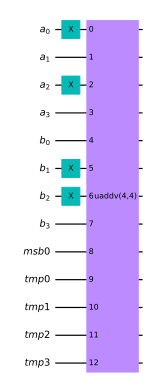

In [4]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.ast as ast
import crsq.arithmetic as ari
import crsq.heap as heap

# mimic result of a preceding circuit
n = 4
ra = QuantumRegister(n, "a")
rb = QuantumRegister(n, "b")
qc = QuantumCircuit(ra, rb)
ari.set_value(qc, ra, 5)
ari.set_value(qc, rb, 6)
# use the AST to compute a + b
frame = heap.Frame(qc)
scope = ast.new_scope(frame)
ast_a = scope.register(ra)  # create leaf AST nodes
ast_b = scope.register(rb)
ast_b += ast_a  # use an AST operator
result_reg = ast_b.register
print("result is held in :", result_reg)
scope.build_circuit()  # emit the gates
frame.circuit.draw(scale=0.6)

result is held in : [Qubit(QuantumRegister(1, 'zz1'), 0), Qubit(QuantumRegister(1, 'zz2'), 0), Qubit(QuantumRegister(1, 'zz3'), 0)]  = [
   Qubit(QuantumRegister(1, 'zz1'), 0)
   Qubit(QuantumRegister(1, 'zz2'), 0)
   Qubit(QuantumRegister(1, 'zz3'), 0)
]
signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:i2(3,0), br:i1(3,0), cr:tmp0
absolute [br,s(0)] -> [br(abs(br)),s(sign(br))]br:i1(3,0), cr:tmp1, s:sign0
unsigned_divider zr:one(3,2), zzr:zz0, dr:i1(3,0), cr:tmp2 qr:qq0(3,2)


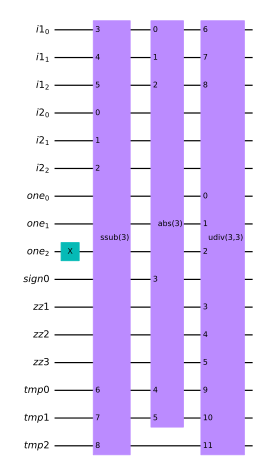

In [6]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.ast as ast
import crsq.arithmetic as ari
import crsq.heap as heap

# potential calculation for a 1D model
n = 3
ri1 = QuantumRegister(n, "i1")   # coord index for electron 1
ri2 = QuantumRegister(n, "i2")   # coord index for electron 2
one = QuantumRegister(n, "one")  # 1.0
# lsb = QuantumRegister(1, "lsb")
# qc = QuantumCircuit(ri1, ri2, one, lsb)
qc = QuantumCircuit(ri1, ri2, one)
ari.set_value(qc, one, 1 << (n-1))
# ari.set_value(qc, lsb, 1)
# use the AST to compute square_root(square(x)+square(y))
frame = heap.Frame(qc)
scope = ast.new_scope(frame)
ast_one = scope.register(one, n - 1)
ast_i1 = scope.register(ri1)
ast_i2 = scope.register(ri2)
ast_i1 -= ast_i2
ast_d = scope.abs(ast_i1)
#ast_d_adj = ast_d.adjust_precision(total_bits=n, fraction_bits=1, new_low_bits=lsb[:])
# ast_v = ast_one / ast_d_adj
ast_v = ast_one / ast_d
result_reg = ast_v.register
print("result is held in :", result_reg, " = [")
for qb in result_reg[:]:
    print("  ", qb)
print("]")
scope.build_circuit()
frame.circuit.draw(scale=0.6)

result is held in : [Qubit(QuantumRegister(1, 'zz30'), 0), Qubit(QuantumRegister(1, 'zz31'), 0), Qubit(QuantumRegister(1, 'zz32'), 0), Qubit(QuantumRegister(1, 'zz33'), 0)]  = [
   Qubit(QuantumRegister(1, 'zz30'), 0)
   Qubit(QuantumRegister(1, 'zz31'), 0)
   Qubit(QuantumRegister(1, 'zz32'), 0)
   Qubit(QuantumRegister(1, 'zz33'), 0)
]
signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:x2(3,0), br:x1(3,0), cr:tmp0
signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:y2(3,0), br:y1(3,0), cr:tmp1
signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:z2(3,0), br:z1(3,0), cr:tmp2
signed_square ar:x1(3,0), cr1:c0, cr2:c1, dr:square0(6,0)
signed_square ar:y1(3,0), cr1:c2, cr2:c3, dr:square1(6,0)
unsigned_adderv [ar,br] -> [ar, br(br+ar)] ar:square1(6,0), br:alias(7,0), cr:tmp3
signed_square ar:z1(3,0), cr1:c4, cr2:c5, dr:square2(6,0)
unsigned_adderv [ar,br] -> [ar, br(br+ar)] ar:square2(6,0), br:alias(8,0), cr:tmp4
square_root zr:alias(8,0), rr:sqrt0(4,0), wr:w0, cr:c6
unsigned_divider zr:one_adj(4,1), 

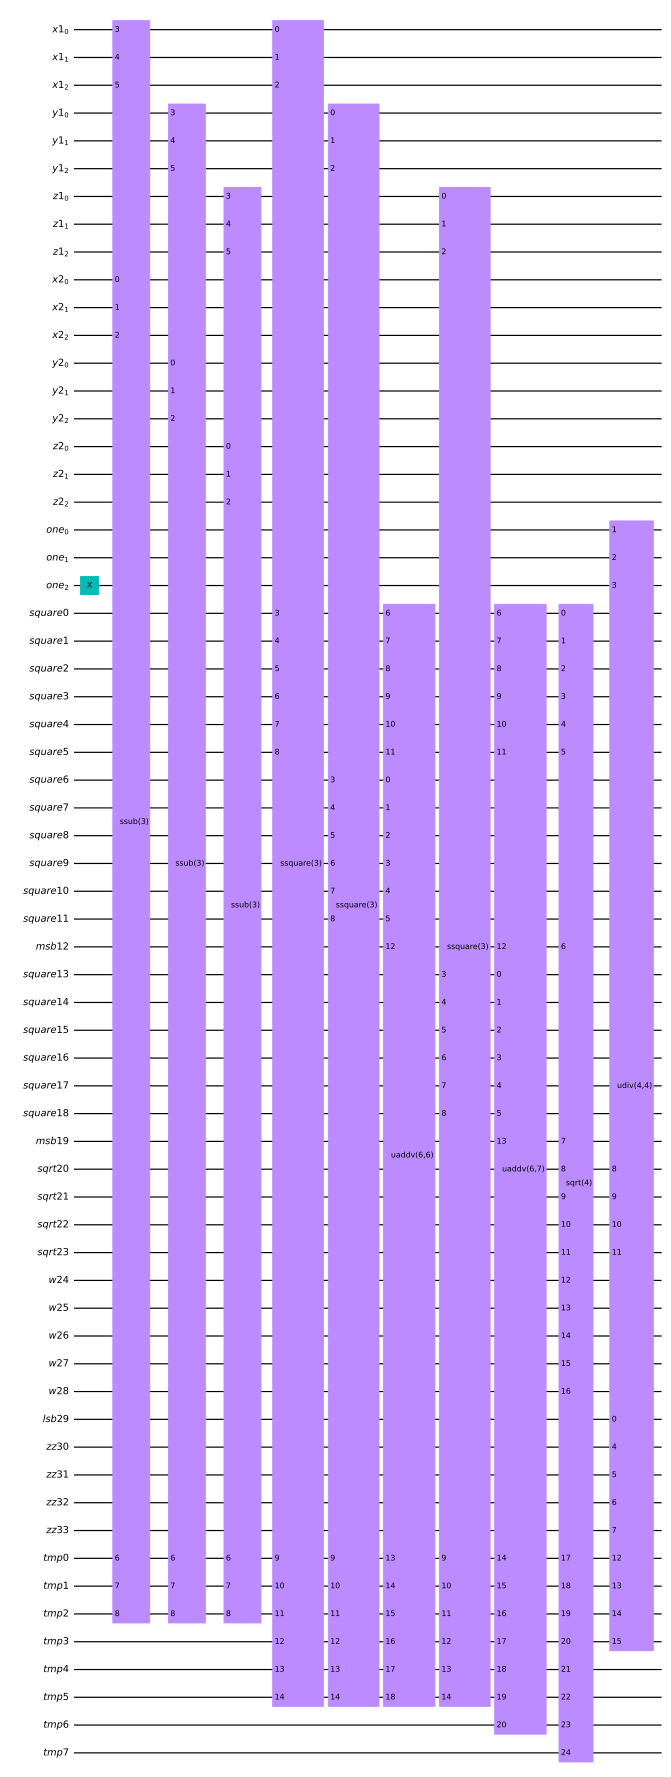

In [7]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.ast as ast
import crsq.arithmetic as ari
import crsq.heap as heap

# potential calculation for a 3D model
n = 3
rx1 = QuantumRegister(n, "x1")   # coord index for electron 1
ry1 = QuantumRegister(n, "y1")   # coord index for electron 1
rz1 = QuantumRegister(n, "z1")   # coord index for electron 1
rx2 = QuantumRegister(n, "x2")   # coord index for electron 1
ry2 = QuantumRegister(n, "y2")   # coord index for electron 1
rz2 = QuantumRegister(n, "z2")   # coord index for electron 1
one = QuantumRegister(n, "one")
#lsb = QuantumRegister(1, "lsb")
#qc = QuantumCircuit(rx1, ry1, rz1, rx2, ry2, rz2, one, lsb)
qc = QuantumCircuit(rx1, ry1, rz1, rx2, ry2, rz2, one)
ari.set_value(qc, one, 1 << (n-1))
#ari.set_value(qc, lsb, 1)
# use the AST to compute square_root(square(x)+square(y))
frame = heap.Frame(qc)
scope = ast.new_scope(frame)
ast_one = scope.register(one)
ast_x1 = scope.register(rx1)
ast_y1 = scope.register(ry1)
ast_z1 = scope.register(rz1)
ast_x2 = scope.register(rx2)
ast_y2 = scope.register(ry2)
ast_z2 = scope.register(rz2)
ast_x1 -= ast_x2
ast_y1 -= ast_y2
ast_z1 -= ast_z2
sqsum = scope.square(ast_x1)
sqsum += scope.square(ast_y1)
sqsum += scope.square(ast_z1)
ast_d = scope.square_root(sqsum)
#ast_d_adj = ast_d.adjust_precision(total_bits=n, fraction_bits=1, new_low_bits=lsb[:])
#ast_v = ast_one / ast_d_adj
ast_v = ast_one / ast_d
result_reg = ast_v.register
print("result is held in :", result_reg, " = [")
for qb in result_reg[:]:
    print("  ", qb)
print("]")
scope.build_circuit()
frame.circuit.draw(scale=0.6)